# Custom indicator example

In [1]:
import yfinance as yf

from mplchart.chart import Chart

from mplchart.library import get_series, calc_ema
from mplchart.primitives import Candlesticks, OHLC, Volume

from dataclasses import dataclass

In [2]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-02-25 00:00:00-05:00,41.915913,42.327465,41.865370,41.932758,87493600,0.0,0.0
2019-02-26 00:00:00-05:00,41.807604,42.190276,41.677638,41.956821,68280800,0.0,0.0
2019-02-27 00:00:00-05:00,41.687275,42.118081,41.571748,42.086792,111341600,0.0,0.0
2019-02-28 00:00:00-05:00,41.954414,42.096411,41.617467,41.672821,112861600,0.0,0.0
2019-03-01 00:00:00-05:00,41.944793,42.154179,41.610255,42.110859,103544800,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-16 00:00:00-05:00,183.419998,184.850006,181.669998,182.309998,49701400,0.0,0.0
2024-02-20 00:00:00-05:00,181.789993,182.429993,180.000000,181.559998,53665600,0.0,0.0
2024-02-21 00:00:00-05:00,181.940002,182.889999,180.660004,182.320007,41529700,0.0,0.0


In [3]:
@dataclass
class DEMA:
    """Double Exponential Moving Average"""

    period: int = 20

    same_scale = True
    # same_scale is an optional class attribute
    # to specify that the indicator can be drawn
    # on the same axes as the previous indicator

    def __call__(self, prices):
        series = get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2

In [4]:
res = DEMA(20)(prices)
res.tail()

Date
2024-02-16 00:00:00-05:00    185.410709
2024-02-20 00:00:00-05:00    184.579178
2024-02-21 00:00:00-05:00    184.008977
2024-02-22 00:00:00-05:00    183.898774
2024-02-23 00:00:00-05:00    183.477238
Name: close, dtype: float64

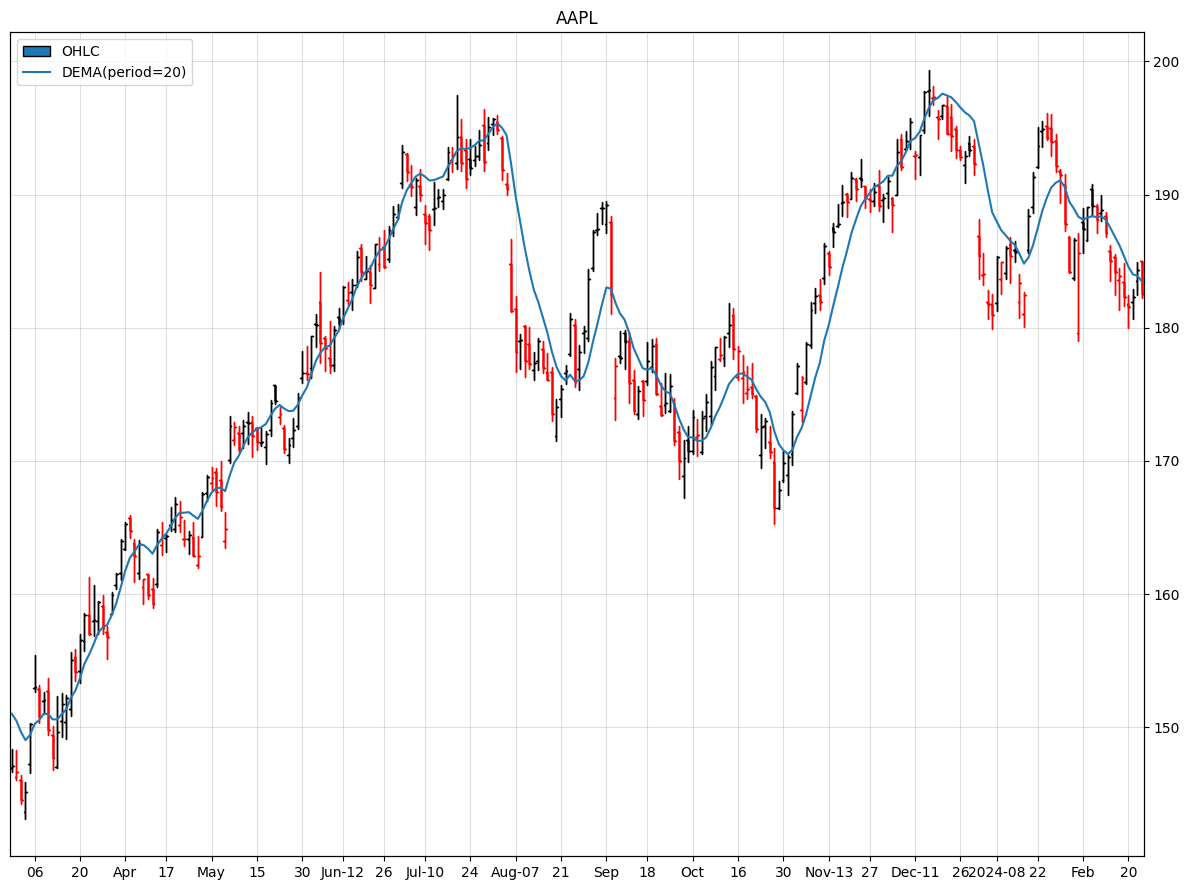

In [5]:
max_bars = 250

indicators = [
    OHLC(),
    DEMA(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)